In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

In [2]:
try:
    cam_list = pd.read_csv('cam_list_3.0.csv')
    print("Let's go................")
except:
    print('No such dataset.......')

Let's go................


## Part 1

In [5]:
# check first 5 rows
cam_list.head()

,cowcode,region,year,country,no,coup,successful,date,combat
0,40,5,1952,Cuba,1,1,1,1952-03-10,1
1,40,5,1957,Cuba,1,1,0,1957-09-05,1
2,41,5,1950,Haiti,1,1,1,1950-05-10,0
3,41,5,1956,Haiti,1,1,0,1956-12-06,0
4,41,5,1957,Haiti,1,1,1,1957-04-02,0


In [6]:
# check last 5 rows
cam_list.tail()

,cowcode,region,year,country,no,coup,successful,date,combat
472,950,4,1987,Fiji,1,1,1,1987-05-14,1
473,950,4,1987,Fiji,2,1,1,1987-09-25,0
474,950,4,2000,Fiji,1,1,0,2000-05-19,1
475,950,4,2000,Fiji,2,1,1,2000-05-29,0
476,950,4,2006,Fiji,1,1,1,2006-12-05,0


In [12]:
# check number of columns

cam_list.columns

Index(['cowcode', 'region', 'year', 'country', 'no', 'coup', 'successful',
       'date', 'combat'],
      dtype='object')

In [7]:
# check shape
cam_list.shape

(477, 9)

In [9]:
# check datatype
cam_list.dtypes

cowcode        int64
region         int64
year           int64
country       object
no             int64
coup           int64
successful     int64
date          object
combat         int64
dtype: object

In [8]:
# more info
cam_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cowcode     477 non-null    int64 
 1   region      477 non-null    int64 
 2   year        477 non-null    int64 
 3   country     477 non-null    object
 4   no          477 non-null    int64 
 5   coup        477 non-null    int64 
 6   successful  477 non-null    int64 
 7   date        477 non-null    object
 8   combat      477 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 33.7+ KB


In [27]:
# check the count of features/ non-null values in each column -> 

cam_list.count()

cowcode       477
region        477
year          477
country       477
no            477
coup          477
successful    477
date          477
combat        477
dtype: int64

In [11]:
# describe/more statistics

cam_list.describe().T

,count,mean,std,min,25%,50%,75%,max
cowcode,477.0,434.129979,244.649414,40.0,150.0,452.0,625.0,950.0
region,477.0,3.501048,1.166091,1.0,3.0,3.0,5.0,5.0
year,477.0,1977.649895,15.949272,1950.0,1965.0,1976.0,1989.0,2017.0
no,477.0,1.163522,0.442599,1.0,1.0,1.0,1.0,4.0
coup,477.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
successful,477.0,0.480084,0.500128,0.0,0.0,0.0,1.0,1.0
combat,477.0,0.599581,0.490498,0.0,0.0,1.0,1.0,1.0


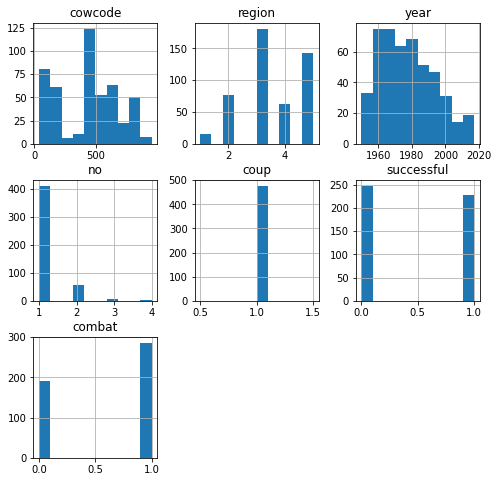

In [14]:
# check hist

cam_list.hist(figsize=(8, 8))
plt.show()

In [15]:
# determine the number of unique categories in each variable: The output of the preceding code shows the number of distinct categories per variable, that is, the cardinality:

cam_list.nunique()

cowcode        99
region          5
year           67
country        99
no              4
coup            1
successful      2
date          470
combat          2
dtype: int64

Text(0.5, 1.0, 'Cardinality')

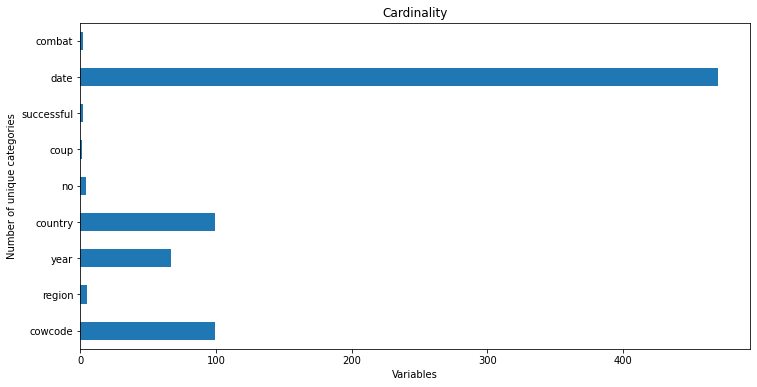

In [17]:
# plot the cardinality:

cam_list.nunique().plot.barh(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

## Part 2

`Cleaning of Data`

In [18]:
# Let's replace the empty strings with NaN values

cam_list = cam_list.replace(' ', np.nan)

In [19]:
# Let's replace the question marks (?) with NaN values

cam_list = cam_list.replace('?', np.nan)

In [20]:
# Let's replace the question marks (.) with NaN values

cam_list = cam_list.replace('.', np.nan)

In [21]:
# Let's replace \N (always add an extra forward class)-> (\\N) with NaN values

cam_list = cam_list.replace('\\N', np.nan)

In [22]:
# check for duplicated values

cam_list.duplicated().sum() # there are no duplicates

0

In [24]:
# check for missing values
cam_list.isna().sum().sum() # there are no missing values

0

In [25]:
# display categorical features/columns -> 

categorical_columns = cam_list.select_dtypes(include=[np.object0]).columns

categorical_columns

Index(['country', 'date'], dtype='object')

In [26]:
# display numerical features/columns -> 

numerical_columns = cam_list.select_dtypes(include=[np.number]).columns

numerical_columns

Index(['cowcode', 'region', 'year', 'no', 'coup', 'successful', 'combat'], dtype='object')

## Part 3

`Exploratory Data Analysis`

In [28]:
cam_list.sample(n=4)

,cowcode,region,year,country,no,coup,successful,date,combat
222,450,3,1985,Liberia,2,1,0,1985-11-12,1
237,452,3,1978,Ghana,1,1,1,1978-07-05,0
93,140,5,1964,Brazil,1,1,1,1964-03-30,1
465,840,4,1987,Philippines,1,1,0,1987-01-27,1


In [29]:
# How many countries have experienced coups
cam_list.country.nunique()

99

In [37]:
countries_coups = cam_list.country.value_counts().reset_index()
countries_coups.rename(columns={'index':'Country', 'country':'How Many Times Have Coups Occurred'}, inplace=True)
countries_coups

,Country,How Many Times Have Coups Occurred
0,Bolivia,22
1,Argentina,17
2,Haiti,15
3,Venezuela,14
4,Sudan,12
...,...,...
94,Iran,1
95,Romania,1
96,Cameroon,1
97,Spain,1


Text(0.5, 1.0, 'No. of Military Coups per Country')

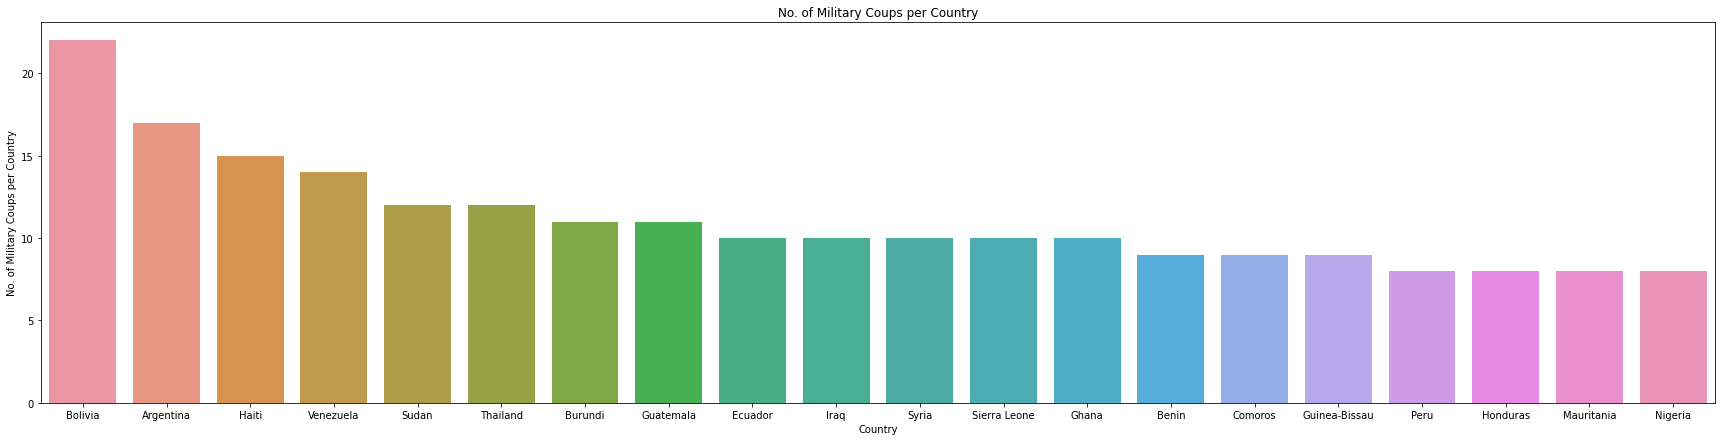

In [53]:
# Count Plot

plt.figure(figsize=(30,7))

g = sns.countplot(
    x='country',
    data=cam_list,
    order=cam_list['country'].value_counts().index[0:20]
)
g.set_xlabel('Country')
g.set_ylabel('No. of Military Coups per Country')
g.set_title('No. of Military Coups per Country')

<AxesSubplot: >

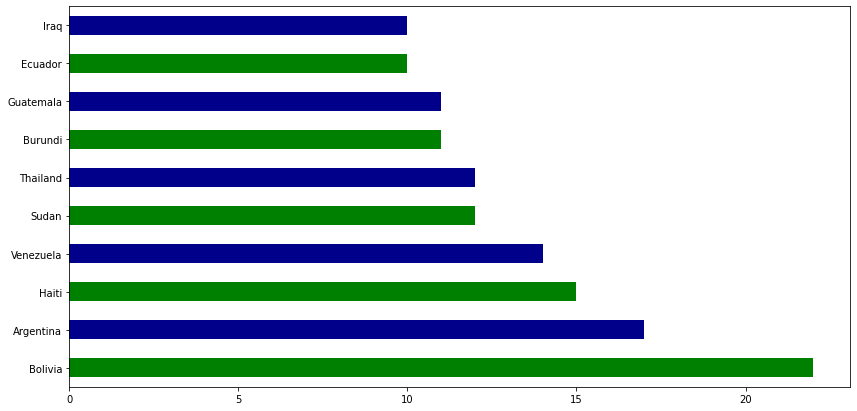

In [67]:
# barh plot

plt.figure(figsize=(14,7))
cam_list.country.value_counts()[:10].plot(
    kind='barh', color=['green','darkblue']
)

<AxesSubplot: ylabel='country'>

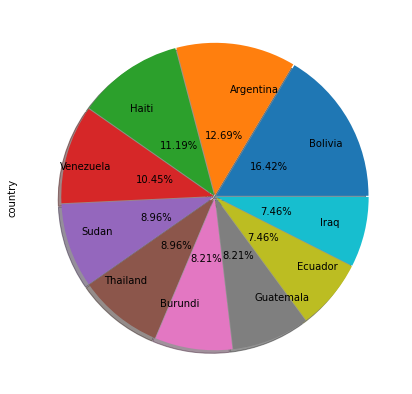

In [64]:
# pie chart
plt.figure(figsize=(14,7))
cam_list.country.value_counts()[:10].plot(
    kind='pie', autopct='%.2f%%', pctdistance=0.4, shadow=True, labeldistance=0.7, explode=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
)

In [74]:
# line plot showing number of military coups per country
ax = px.line(data_frame=countries_coups, x='Country', y='How Many Times Have Coups Occurred')
ax

=======

In [75]:
cam_list.sample(n=4)

,cowcode,region,year,country,no,coup,successful,date,combat
124,160,5,1951,Argentina,1,1,0,1951-09-28,1
381,651,2,2011,Egypt,1,1,1,2011-02-11,0
227,451,3,1971,Sierra Leone,1,1,0,1971-03-23,0
62,101,5,1962,Venezuela,2,1,0,1962-06-02,1


In [76]:
cam_list.region.nunique()

5

In [77]:
cam_list.region.unique()

array([5, 1, 3, 2, 4], dtype=int64)

In [83]:
regi = cam_list.region.value_counts().reset_index()
regi.rename(columns={'index':'Region', 'region':'How Many Countries Fall in this Region'}, inplace=True)
regi

,Region,How Many Countries Fall in this Region
0,3,181
1,5,142
2,2,77
3,4,62
4,1,15


In [84]:
# line plot showing number of military coups per country
ax = px.line(data_frame=regi, x='Region', y='How Many Countries Fall in this Region')
ax

Text(0.5, 1.0, 'Number of Countries Per Region where Military Coups have Occurred')

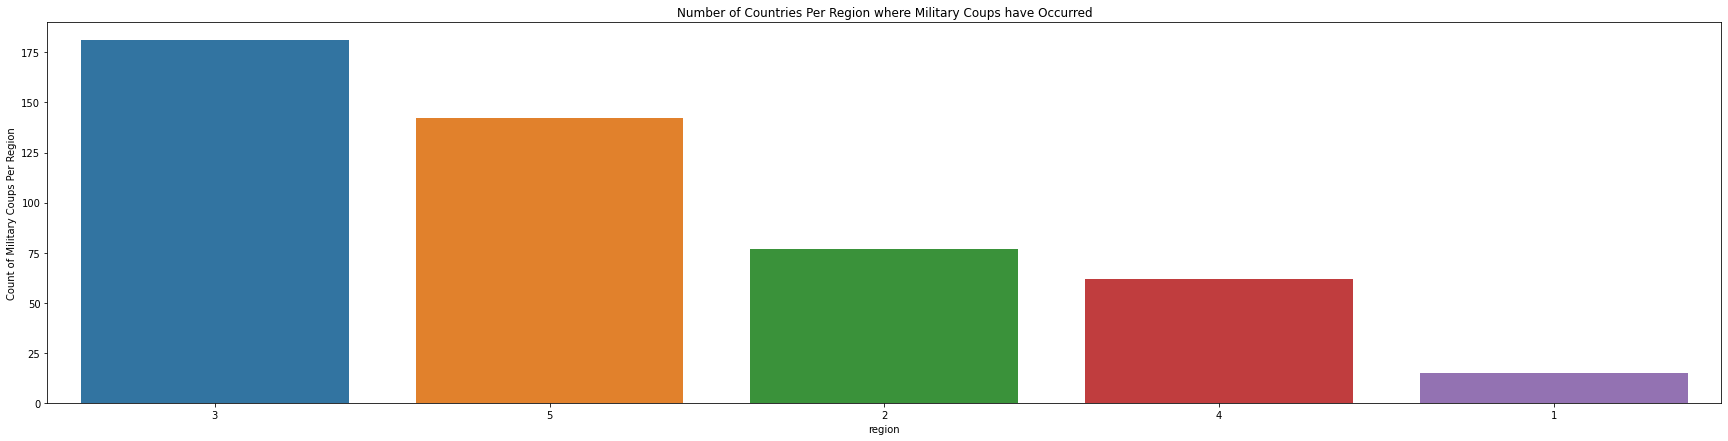

In [86]:
# Count Plot

plt.figure(figsize=(30,7))

g = sns.countplot(
    x='region',
    data=cam_list,
    order=cam_list['region'].value_counts().index[0:20]
)
g.set_xlabel('region')
g.set_ylabel('Count of Military Coups Per Region')
g.set_title('Number of Countries Per Region where Military Coups have Occurred')

<AxesSubplot: ylabel='region'>

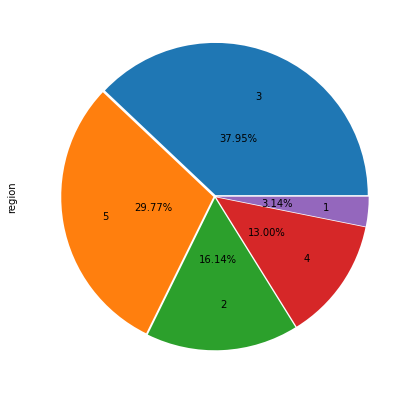

In [89]:
# pie chart
plt.figure(figsize=(14,7))
cam_list.region.value_counts().plot(
    kind='pie', autopct='%.2f%%', pctdistance=0.4, labeldistance=0.7, explode=[0.01, 0.01, 0.01, 0.01, 0.01]
)

<AxesSubplot: >

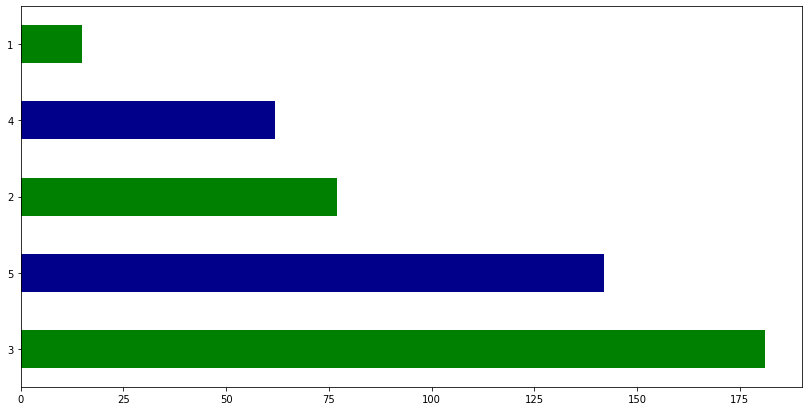

In [90]:
# barh plot

plt.figure(figsize=(14,7))
cam_list.region.value_counts().plot(
    kind='barh', color=['green','darkblue']
)

===========

In [94]:
cam_list.sample(n=4)

,cowcode,region,year,country,no,coup,successful,date,combat
367,640,2,1980,Turkey,1,1,1,1980-09-10,0
471,910,4,2012,Papua New Guinea,1,1,0,2012-01-26,1
474,950,4,2000,Fiji,1,1,0,2000-05-19,1
143,235,1,1962,Portugal,1,1,0,1962-01-01,1


In [3]:
cam_list.successful.nunique()

2

In [4]:
cam_list.successful.unique()

array([1, 0], dtype=int64)

In [14]:
sc = cam_list.successful.value_counts().reset_index()
sc.rename(columns={'index':'Successful_Coups', 'successful':'Total Number of Successful Coups'}, inplace=True)
sc

,Successful_Coups,Total Number of Successful Coups
0,0,248
1,1,229


Text(0.5, 1.0, 'Successful or Not Military coups')

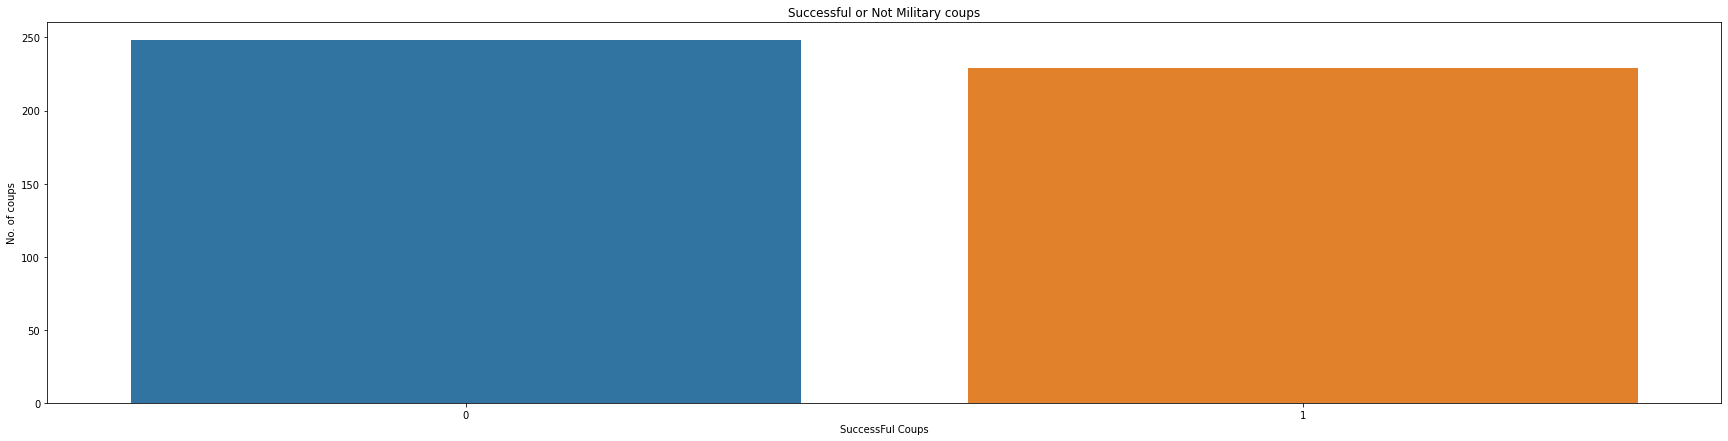

In [15]:
# Count Plot of successful coups

plt.figure(figsize=(30,7))

g = sns.countplot(
    x='successful',
    data=cam_list,
    order=cam_list['successful'].value_counts().index[0:2]
)
g.set_xlabel('SuccessFul Coups')
g.set_ylabel('No. of coups')
g.set_title('Successful or Not Military coups')

<AxesSubplot: ylabel='successful'>

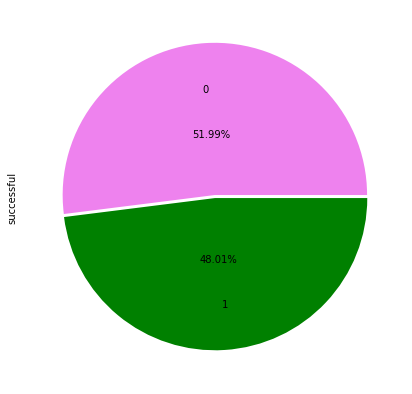

In [17]:
# pie chart
plt.figure(figsize=(14,7))
cam_list.successful.value_counts().plot(
    kind='pie', autopct='%.2f%%', pctdistance=0.4, labeldistance=0.7, explode=[0.01, 0.01], colors=['violet','green']
)

<AxesSubplot: >

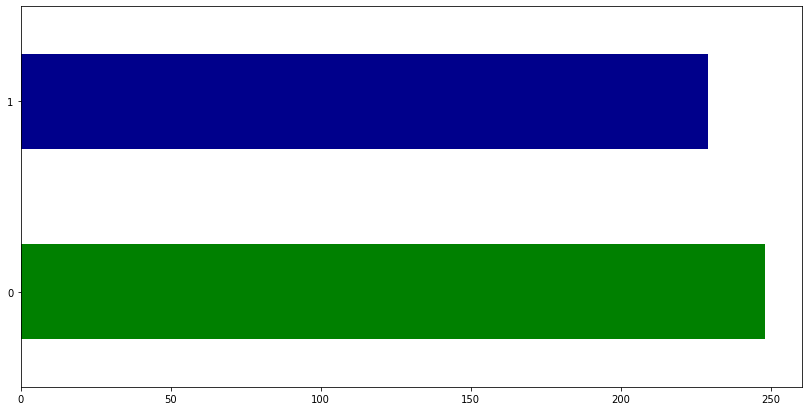

In [18]:
# barh plot

plt.figure(figsize=(14,7))
cam_list.successful.value_counts().plot(
    kind='barh', color=['green','darkblue']
)

===============

In [3]:
cam_list.sample(n=4)

,cowcode,region,year,country,no,coup,successful,date,combat
26,90,5,1960,Guatemala,1,1,0,1960-11-13,1
262,482,3,1981,Central African Republic,1,1,1,1981-09-01,0
345,620,2,1969,Libya,1,1,1,1969-09-01,1
69,115,5,1982,Suriname,1,1,1,1982-02-05,0


In [4]:
cam_list.combat.nunique()

2

In [5]:
cam_list.combat.unique()

array([1, 0], dtype=int64)

In [6]:
cam_list.combat.value_counts()

1    286
0    191
Name: combat, dtype: int64

In [8]:
co = cam_list.combat.value_counts().reset_index()
co.rename(columns={'index':'combat', 'combat':'Whether combat happened during Coups'}, inplace=True)
co

,combat,Whether combat happened during Coups
0,1,286
1,0,191


Text(0.5, 1.0, 'Combat during coups')

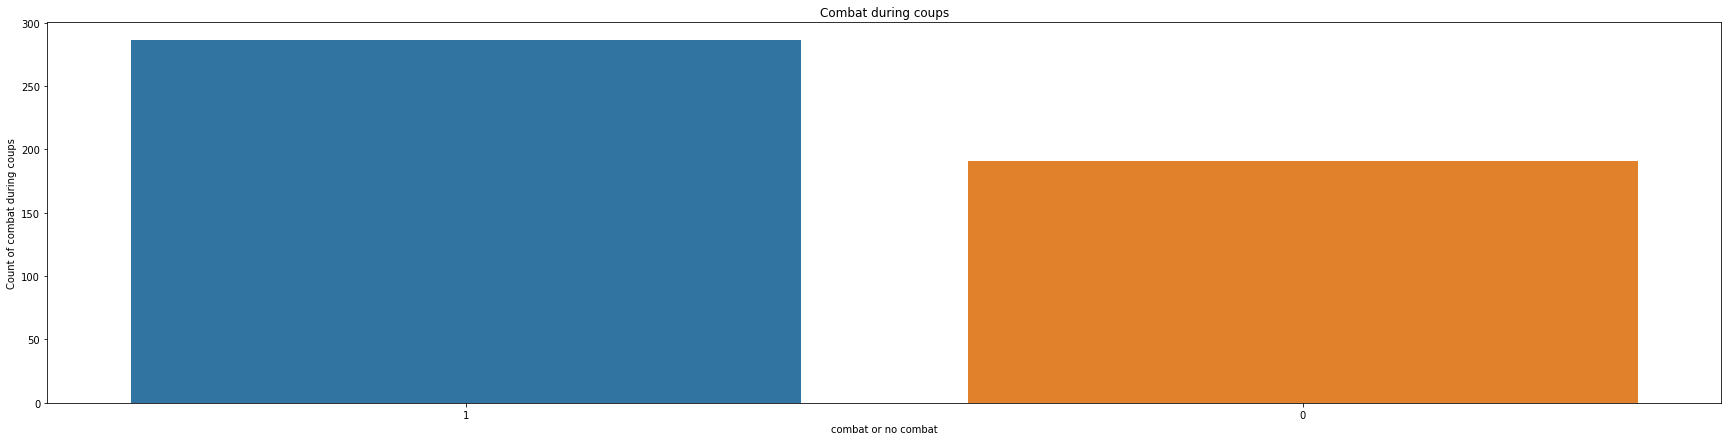

In [10]:
# Count Plot of successful coups

plt.figure(figsize=(30,7))

g = sns.countplot(
    x='combat',
    data=cam_list,
    order=cam_list['combat'].value_counts().index[0:2]
)
g.set_xlabel('combat or no combat')
g.set_ylabel('Count of combat during coups')
g.set_title('Combat during coups')

<AxesSubplot: ylabel='combat'>

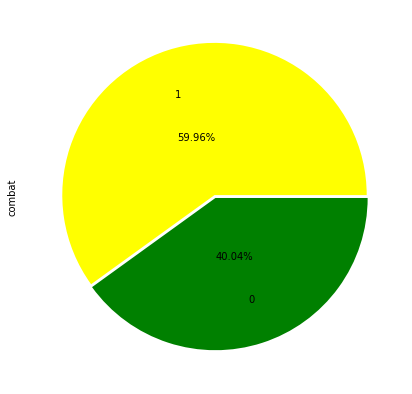

In [12]:
# pie chart
plt.figure(figsize=(14,7))
cam_list.combat.value_counts().plot(
    kind='pie', autopct='%.2f%%', pctdistance=0.4, labeldistance=0.7, explode=[0.01, 0.01], colors=['yellow','green']
)

<AxesSubplot: >

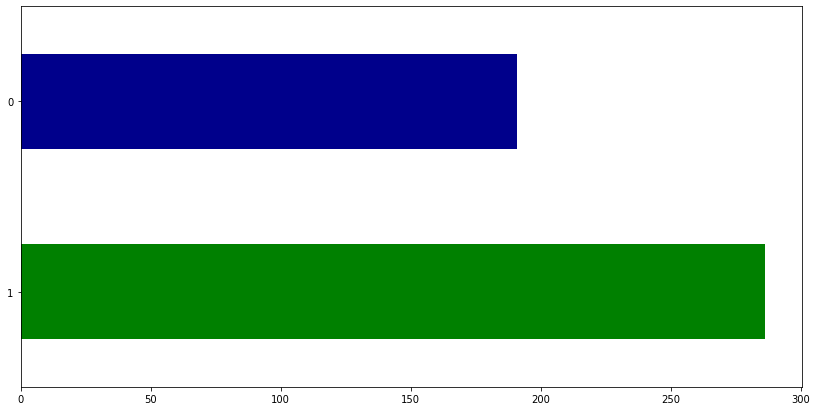

In [13]:
# barh plot

plt.figure(figsize=(14,7))
cam_list.combat.value_counts().plot(
    kind='barh', 
    color=['green','darkblue'])

========

In [14]:
cam_list.sample(n=3)

,cowcode,region,year,country,no,coup,successful,date,combat
337,591,3,1982,Seychelles,1,1,0,1982-08-18,1
473,950,4,1987,Fiji,2,1,1,1987-09-25,0
338,600,2,1971,Morocco,1,1,0,1971-07-10,0


In [8]:
cam_list.groupby('country')['combat'].size().reset_index()

,country,combat
0,Afghanistan,4
1,Algeria,4
2,Angola,1
3,Argentina,17
4,Azerbaijan,3
...,...,...
94,Venezuela,14
95,Yemen Arab Republic,5
96,Yemen People's Republic,5
97,Zambia,3


=========

In [9]:
cam_list.sample(n=3)

,cowcode,region,year,country,no,coup,successful,date,combat
186,434,3,1972,Benin,1,1,0,1972-02-23,1
23,90,5,1954,Guatemala,1,1,1,1954-06-27,0
75,130,5,1966,Ecuador,1,1,1,1966-03-29,0


In [12]:
cam_list.groupby(['year', 'country'])['successful'].size().reset_index()

,year,country,successful
0,1950,Bolivia,1
1,1950,Haiti,1
2,1951,Argentina,1
3,1951,Bolivia,1
4,1951,Syria,1
...,...,...,...
406,2014,Thailand,1
407,2015,Burkina Faso,1
408,2015,Burundi,1
409,2016,Turkey,1


====

In [13]:
cam_list.sample(n=2)

,cowcode,region,year,country,no,coup,successful,date,combat
334,581,3,2001,Comoros,1,1,0,2001-12-20,1
171,420,3,1994,Gambia,1,1,1,1994-07-23,1


In [15]:
cam_list.groupby(['region','country'])['coup'].size().reset_index()

,region,country,coup
0,1,Azerbaijan,3
1,1,Cyprus,1
2,1,Greece,3
3,1,Portugal,5
4,1,Romania,1
...,...,...,...
94,5,Paraguay,5
95,5,Peru,8
96,5,Suriname,4
97,5,Uruguay,1


=========